# GRUPO 7. BIG DATA. PREDICCIÓN DATOS CALIDAD DEL AIRE Y CLIMATOLÓGICOS
---



#  1.Carga de los datos


In [ ]:
# Cargamos las librerias que vamos a usar.
import pandas as pd
import datetime
from fbprophet import Prophet
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline
from scipy.stats import norm
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

In [ ]:
import pandas as pd
from google.colab import files

uploaded = files.upload()

Saving datosdefinitivos.csv to datosdefinitivos.csv


In [ ]:
# Carga dataframe
datos_original = pd.read_csv('datosdefinitivos.csv',sep=';')


**VISUALIZACIÓN DATAFRAME**

In [ ]:
# Consultamos el dataframe
# Magnitud 81: Velocidad_viento ; Magnitud 82: Direccion_viento ; Magnitud 83: Temperatura ;
#Magnitud 86: Humedad_relativa ;  Magnitud 87: Presion_atmosferica ;  Magnitud 88: Radiaccion_solar ;
#Magnitud 89: Precipitacion
datos_original.head()

,id,id_merge,fechahora,fecha,hora,estacion_real,magnitud,descripcion_magnitud,factor_calculo_horario,ica_parcial,valor_magnitud,provincia,municipio,dia_de_la_semana,valor_magnitud_81,valor_magnitud_82,valor_magnitud_83,valor_magnitud_86,valor_magnitud_87,valor_magnitud_88,valor_magnitud_89
0,2020-1-1-00:00-28102001-1,2020-1-1-00:00-28102001,2020-1-1 00:00,2020-1-1,1,28102001,1,Dióxido de azufre,0.286,0.286,1.0,28,102,2,1.1,15.0,2.7,86.0,946.0,12.0,0.0
1,2020-1-1-00:00-28102001-6,2020-1-1-00:00-28102001,2020-1-1 00:00,2020-1-1,1,28102001,6,Monóxido de carbono,10.000,3.000,0.3,28,102,2,1.1,15.0,2.7,86.0,946.0,12.0,0.0
2,2020-1-1-00:00-28102001-8,2020-1-1-00:00-28102001,2020-1-1 00:00,2020-1-1,1,28102001,8,Dióxido de nitrógeno,0.500,4.000,8.0,28,102,2,1.1,15.0,2.7,86.0,946.0,12.0,0.0
3,2020-1-1-00:00-28102001-10,2020-1-1-00:00-28102001,2020-1-1 00:00,2020-1-1,1,28102001,10,Partículas en suspensión < PM10,0.667,5.336,8.0,28,102,2,1.1,15.0,2.7,86.0,946.0,12.0,0.0
4,2020-1-1-00:00-28102001-14,2020-1-1-00:00-28102001,2020-1-1 00:00,2020-1-1,1,28102001,14,Ozono,0.556,21.684,39.0,28,102,2,1.1,15.0,2.7,86.0,946.0,12.0,0.0


In [ ]:
# Consultamos datos estadísticos comunes.
datos_original.describe()

,hora,estacion_real,magnitud,factor_calculo_horario,ica_parcial,valor_magnitud,provincia,municipio,dia_de_la_semana,valor_magnitud_81,valor_magnitud_82,valor_magnitud_83,valor_magnitud_86,valor_magnitud_87,valor_magnitud_88,valor_magnitud_89
count,306745.000000,3.067450e+05,306745.000000,306745.000000,306745.000000,306745.000000,306745.0,306745.000000,306745.000000,306745.000000,306745.000000,306745.000000,306745.000000,306745.000000,306745.000000,306745.000000
mean,12.526212,2.807419e+07,9.553711,1.309927,14.641647,25.458674,28.0,74.179915,3.050710,1.765884,171.096181,11.290017,68.078267,937.273299,168.820092,0.058763
std,6.951550,5.199164e+04,3.699688,2.585036,15.616766,28.260308,0.0,51.991653,1.990645,1.459266,90.260191,6.490674,21.489816,29.144508,259.937053,0.424088
min,1.000000,2.800500e+07,1.000000,0.286000,0.286000,0.100000,28.0,5.000000,0.000000,0.000000,0.000000,-9.700000,7.000000,782.000000,0.000000,0.000000
25%,6.000000,2.801600e+07,8.000000,0.500000,2.668000,3.000000,28.0,16.000000,1.000000,0.700000,91.000000,6.900000,52.000000,929.000000,1.000000,0.000000
50%,13.000000,2.807401e+07,10.000000,0.556000,8.000000,13.000000,28.0,74.000000,3.000000,1.400000,173.000000,10.600000,70.000000,944.000000,12.000000,0.000000
75%,19.000000,2.810200e+07,14.000000,0.667000,24.000000,43.000000,28.0,102.000000,5.000000,2.400000,242.000000,14.900000,86.000000,954.000000,267.000000,0.000000
max,24.000000,2.818000e+07,14.000000,10.000000,259.463000,389.000000,28.0,180.000000,6.000000,13.900000,360.000000,36.700000,100.000000,1017.000000,1435.000000,21.000000


In [ ]:
# Consultamos la informacion del dataframe
datos_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306745 entries, 0 to 306744
Data columns (total 21 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   id                      306745 non-null  object 
 1   id_merge                306745 non-null  object 
 2   fechahora               306745 non-null  object 
 3   fecha                   306745 non-null  object 
 4   hora                    306745 non-null  int64  
 5   estacion_real           306745 non-null  int64  
 6   magnitud                306745 non-null  int64  
 7   descripcion_magnitud    306745 non-null  object 
 8   factor_calculo_horario  306745 non-null  float64
 9   ica_parcial             306745 non-null  float64
 10  valor_magnitud          306745 non-null  float64
 11  provincia               306745 non-null  int64  
 12  municipio               306745 non-null  int64  
 13  dia_de_la_semana        306745 non-null  int64  
 14  valor_magnitud_81   

In [ ]:
# Consultamos las columnas.
datos_original.columns

Index(['id', 'id_merge', 'fechahora', 'fecha', 'hora', 'estacion_real',
       'magnitud', 'descripcion_magnitud', 'factor_calculo_horario',
       'ica_parcial', 'valor_magnitud', 'provincia', 'municipio',
       'dia_de_la_semana', 'valor_magnitud_81', 'valor_magnitud_82',
       'valor_magnitud_83', 'valor_magnitud_86', 'valor_magnitud_87',
       'valor_magnitud_88', 'valor_magnitud_89'],
      dtype='object')

In [ ]:
# Renombramos columnas magnitudes
datos_original = datos_original.rename(columns={"valor_magnitud_81": "Velocidad_viento", "valor_magnitud_82": "Direccion_viento", "valor_magnitud_83": "Temperatura", "valor_magnitud_86": "Humedad_relativa", "valor_magnitud_87": "Presion_atmosferica", "valor_magnitud_88": "Radiaccion_solar", "valor_magnitud_89": "Precipitacion"})
datos_original.head()

,id,id_merge,fechahora,fecha,hora,estacion_real,magnitud,descripcion_magnitud,factor_calculo_horario,ica_parcial,valor_magnitud,provincia,municipio,dia_de_la_semana,Velocidad_viento,Direccion_viento,Temperatura,Humedad_relativa,Presion_atmosferica,Radiaccion_solar,Precipitacion
0,2020-1-1-00:00-28102001-1,2020-1-1-00:00-28102001,2020-1-1 00:00,2020-1-1,1,28102001,1,Dióxido de azufre,0.286,0.286,1.0,28,102,2,1.1,15.0,2.7,86.0,946.0,12.0,0.0
1,2020-1-1-00:00-28102001-6,2020-1-1-00:00-28102001,2020-1-1 00:00,2020-1-1,1,28102001,6,Monóxido de carbono,10.000,3.000,0.3,28,102,2,1.1,15.0,2.7,86.0,946.0,12.0,0.0
2,2020-1-1-00:00-28102001-8,2020-1-1-00:00-28102001,2020-1-1 00:00,2020-1-1,1,28102001,8,Dióxido de nitrógeno,0.500,4.000,8.0,28,102,2,1.1,15.0,2.7,86.0,946.0,12.0,0.0
3,2020-1-1-00:00-28102001-10,2020-1-1-00:00-28102001,2020-1-1 00:00,2020-1-1,1,28102001,10,Partículas en suspensión < PM10,0.667,5.336,8.0,28,102,2,1.1,15.0,2.7,86.0,946.0,12.0,0.0
4,2020-1-1-00:00-28102001-14,2020-1-1-00:00-28102001,2020-1-1 00:00,2020-1-1,1,28102001,14,Ozono,0.556,21.684,39.0,28,102,2,1.1,15.0,2.7,86.0,946.0,12.0,0.0


In [ ]:
# Consultamos el tipo de datos de cada columna.
datos_original.dtypes

id                         object
id_merge                   object
fechahora                  object
fecha                      object
hora                        int64
estacion_real               int64
magnitud                    int64
descripcion_magnitud       object
factor_calculo_horario    float64
ica_parcial               float64
valor_magnitud            float64
provincia                   int64
municipio                   int64
dia_de_la_semana            int64
Velocidad_viento          float64
Direccion_viento          float64
Temperatura               float64
Humedad_relativa          float64
Presion_atmosferica       float64
Radiaccion_solar          float64
Precipitacion             float64
dtype: object

In [ ]:
#Consultamos Valores faltantes
datos_original.isnull().sum()


id                        0
id_merge                  0
fechahora                 0
fecha                     0
hora                      0
estacion_real             0
magnitud                  0
descripcion_magnitud      0
factor_calculo_horario    0
ica_parcial               0
valor_magnitud            0
provincia                 0
municipio                 0
dia_de_la_semana          0
Velocidad_viento          0
Direccion_viento          0
Temperatura               0
Humedad_relativa          0
Presion_atmosferica       0
Radiaccion_solar          0
Precipitacion             0
dtype: int64

# Nueva sección

# Nueva sección

In [ ]:
#Eliminamos valores Nulos
datos_filtrados = datos_original.dropna()
datos_filtrados.isnull().sum()


id                        0
id_merge                  0
fechahora                 0
fecha                     0
hora                      0
estacion_real             0
magnitud                  0
descripcion_magnitud      0
factor_calculo_horario    0
ica_parcial               0
valor_magnitud            0
provincia                 0
municipio                 0
dia_de_la_semana          0
Velocidad_viento          0
Direccion_viento          0
Temperatura               0
Humedad_relativa          0
Presion_atmosferica       0
Radiaccion_solar          0
Precipitacion             0
dtype: int64

In [ ]:
datos_filtrados.loc[:, (datos_filtrados == 0).all()]
datos_filtrados =datos_filtrados[datos_filtrados['ica_parcial'] !=0]

In [ ]:
datos_filtrados.head()

,id,id_merge,fechahora,fecha,hora,estacion_real,magnitud,descripcion_magnitud,factor_calculo_horario,ica_parcial,valor_magnitud,provincia,municipio,dia_de_la_semana,Velocidad_viento,Direccion_viento,Temperatura,Humedad_relativa,Presion_atmosferica,Radiaccion_solar,Precipitacion
0,2020-1-1-00:00-28102001-1,2020-1-1-00:00-28102001,2020-1-1 00:00,2020-1-1,1,28102001,1,Dióxido de azufre,0.286,0.286,1.0,28,102,2,1.1,15.0,2.7,86.0,946.0,12.0,0.0
1,2020-1-1-00:00-28102001-6,2020-1-1-00:00-28102001,2020-1-1 00:00,2020-1-1,1,28102001,6,Monóxido de carbono,10.000,3.000,0.3,28,102,2,1.1,15.0,2.7,86.0,946.0,12.0,0.0
2,2020-1-1-00:00-28102001-8,2020-1-1-00:00-28102001,2020-1-1 00:00,2020-1-1,1,28102001,8,Dióxido de nitrógeno,0.500,4.000,8.0,28,102,2,1.1,15.0,2.7,86.0,946.0,12.0,0.0
3,2020-1-1-00:00-28102001-10,2020-1-1-00:00-28102001,2020-1-1 00:00,2020-1-1,1,28102001,10,Partículas en suspensión < PM10,0.667,5.336,8.0,28,102,2,1.1,15.0,2.7,86.0,946.0,12.0,0.0
4,2020-1-1-00:00-28102001-14,2020-1-1-00:00-28102001,2020-1-1 00:00,2020-1-1,1,28102001,14,Ozono,0.556,21.684,39.0,28,102,2,1.1,15.0,2.7,86.0,946.0,12.0,0.0


# 2.Visualización de los datos

## a) ICA PARCIAL

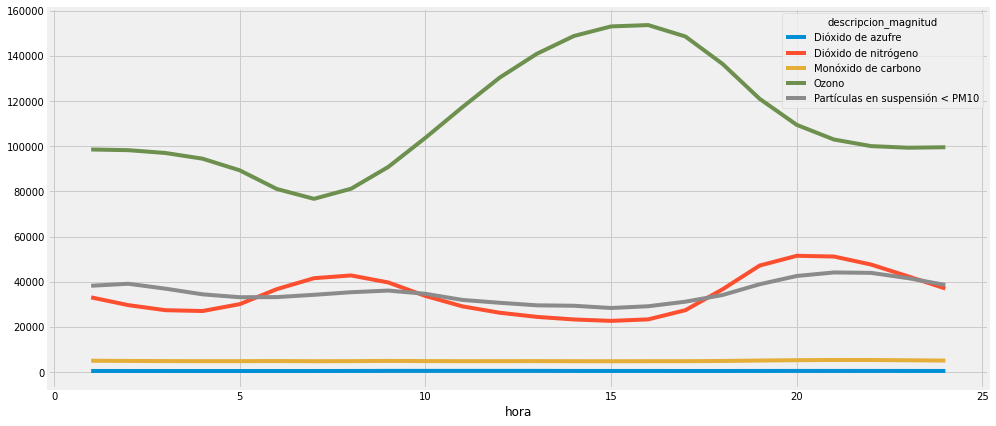

In [ ]:
# Suma de ICA agrupado por Hora y Magnitudes 
fig, ax = plt.subplots(figsize=(15,7))
datos_filtrados.groupby(['hora','descripcion_magnitud']).sum()['ica_parcial'].unstack().plot(ax=ax)

Ozono                              92760
Dióxido de nitrógeno               92700
Partículas en suspensión < PM10    71612
Monóxido de carbono                24904
Dióxido de azufre                  24769
Name: descripcion_magnitud, dtype: int64


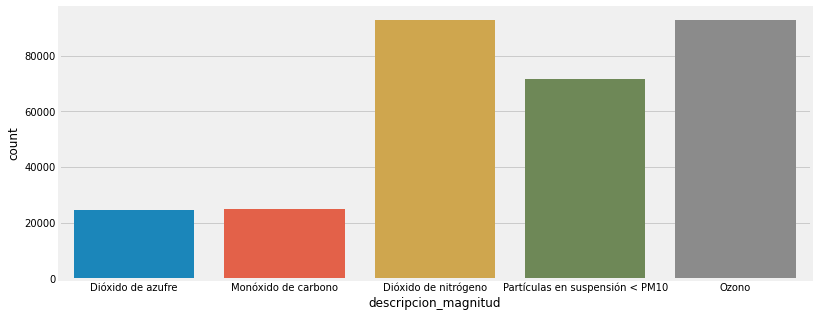

In [ ]:
print(datos_filtrados['descripcion_magnitud'].value_counts())
plt.figure(figsize=(12,5))
sns.countplot(datos_filtrados['descripcion_magnitud'])
plt.show()

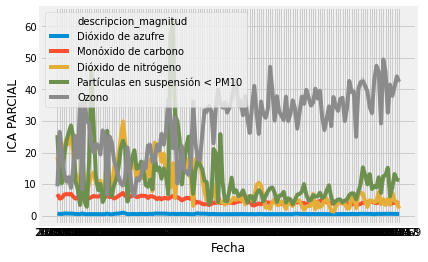

In [ ]:
# Valor ICA por Magnitudes
ax = sns.lineplot(x = 'fecha', y = 'ica_parcial', hue = 'descripcion_magnitud', data = datos_filtrados)
ax.set(xlabel = 'Fecha', ylabel='ICA PARCIAL')
plt.show()

**ICA**   CALIDAD DEL AIRE Índice de Calidad del Aire(µg/m3 )




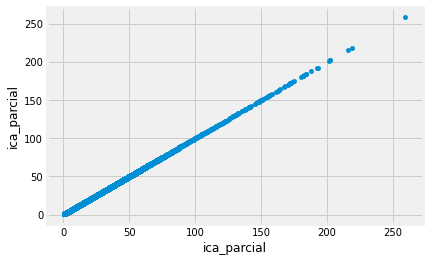

In [ ]:
# Consultamos la concentracion de valores y outliers 
my_plot = datos_filtrados.plot("ica_parcial", "ica_parcial", kind="scatter")
plt.show() 

In [ ]:
# Consultamos los valores que más se repiten en ICA y los que menos.
ica = datos_filtrados['ica_parcial'].value_counts()
ica

0.28600     16439
4.00000      9179
1.00000      9110
2.00000      8844
3.00000      7537
            ...  
70.00040        1
20.79996        1
16.37976        1
20.04936        1
6.57748         1
Name: ica_parcial, Length: 5238, dtype: int64

In [ ]:
# Consultamos el promedio del valor de ICA
ica.mean()

58.561473844979

In [ ]:
# Asimetría y curtosis:
print("Asimetría: %f" % datos_filtrados['ica_parcial'].skew())
print("Curtosis: %f" % datos_filtrados['ica_parcial'].kurt())

Asimetría: 1.409066
Curtosis: 2.960458


In [ ]:
# Convertimos fecha en datetime
df = datos_filtrados.loc[:, ["fecha","ica_parcial"]]
df['fecha'] = pd.DatetimeIndex(df['fecha'])
df.dtypes

fecha          datetime64[ns]
ica_parcial           float64
dtype: object

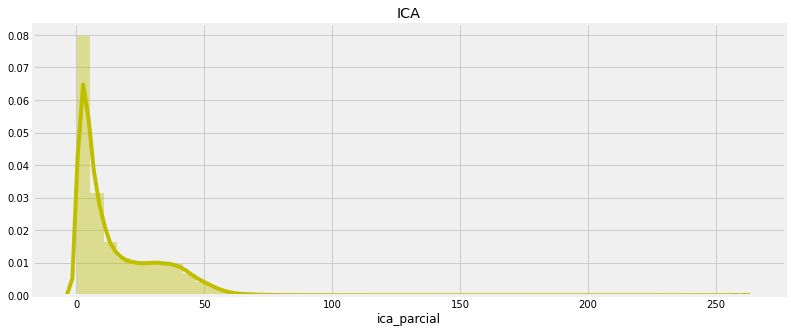

In [ ]:
#Mostramos histograma con valores ica parcial
plt.figure(figsize=(12,5))
plt.title("ICA")
ax = sns.distplot(datos_filtrados["ica_parcial"], color = 'y')

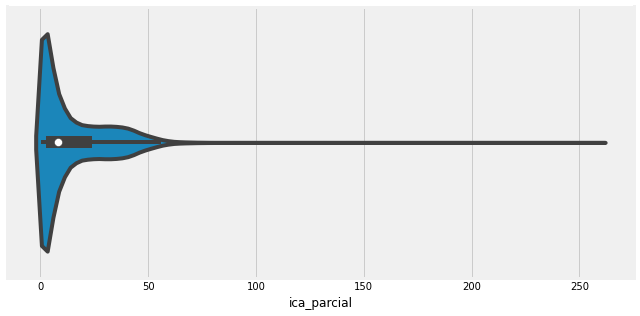

In [ ]:
# Mostramos gráfico tipo violín con datos ica parcial
fig, ax = plt.subplots()
fig.set_size_inches(10,5)
sns.violinplot(datos_filtrados.dropna(subset = ['ica_parcial']).ica_parcial)

In [ ]:
# Mostramos valores medios por meses de ica parcial
df.groupby(df['fecha'].dt.strftime('%B'))['ica_parcial'].mean().sort_values()

fecha
April       13.516675
January     14.673963
March       14.709132
February    14.944857
May         15.341146
Name: ica_parcial, dtype: float64

In [ ]:
# Creamos columnas con el mes, dia y año
df['mes'] = df['fecha'].dt.month
df['dia'] = df['fecha'].dt.day
df['año'] = df['fecha'].dt.year
df

,fecha,ica_parcial,mes,dia,año
0,2020-01-01,0.286,1,1,2020
1,2020-01-01,3.000,1,1,2020
2,2020-01-01,4.000,1,1,2020
3,2020-01-01,5.336,1,1,2020
4,2020-01-01,21.684,1,1,2020
...,...,...,...,...,...
306740,2020-05-25,37.252,5,25,2020
306741,2020-05-26,37.808,5,26,2020
306742,2020-05-28,40.032,5,28,2020
306743,2020-05-28,52.820,5,28,2020


In [ ]:
# Mostramos los meses del análisis que son Enero, Febreo, Marzo, Abril y Mayo
df['mes'].unique()

array([1, 2, 3, 4, 5])

In [ ]:
# Media mensual ICA
df.groupby(['mes']).mean()[['ica_parcial']]

,ica_parcial
mes,
1,14.673963
2,14.944857
3,14.709132
4,13.516675
5,15.341146


Text(0.5, 1.0, 'ICA PROMEDIO MES')

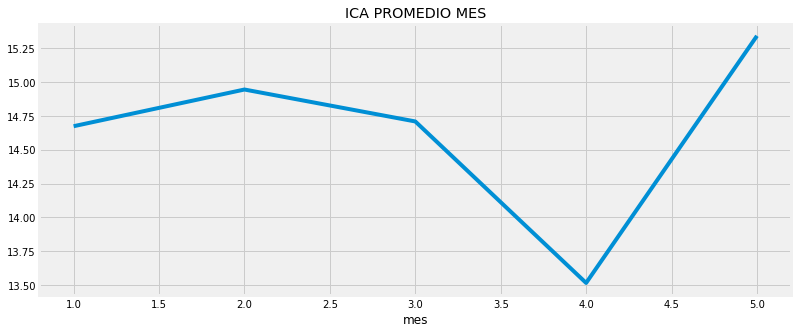

In [ ]:
# Graficamos promedio ica por meses del 1(enero) al 5(mayo) 
dategroup=df.groupby('mes').mean()
plt.figure(figsize=(12,5))
dategroup['ica_parcial'].plot(x=df.fecha)
plt.title('ICA PROMEDIO MES')

Text(0.5, 1.0, 'ICA')

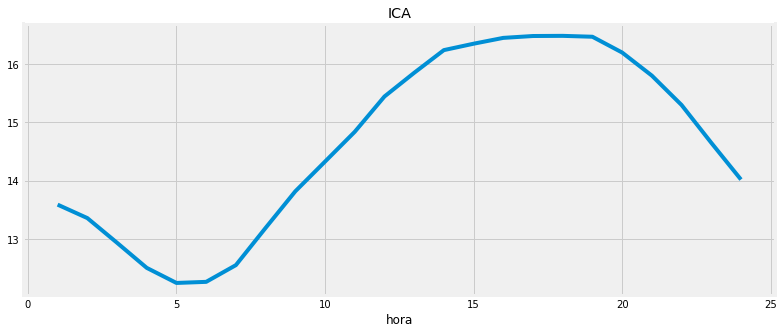

In [ ]:
# Valor ICA por HORAS (24H)
dategroup=datos_filtrados.groupby('hora').mean()
plt.figure(figsize=(12,5))
dategroup['ica_parcial'].plot(x=datos_filtrados.fecha)
plt.title('ICA')

## b) Velocidad del viento

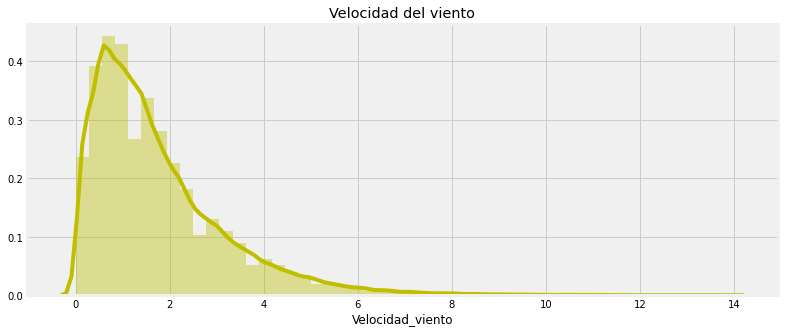

In [ ]:
#Mostramos histograma con valores velocidad de viento
plt.figure(figsize=(12,5))
plt.title("Velocidad del viento")
ax = sns.distplot(datos_filtrados["Velocidad_viento"], color = 'y')

In [ ]:
# Asimetría y curtosis:
print("Asimetría: %f" % datos_filtrados['Velocidad_viento'].skew())
print("Curtosis: %f" % datos_filtrados['Velocidad_viento'].kurt())

Asimetría: 1.793058
Curtosis: 5.008540


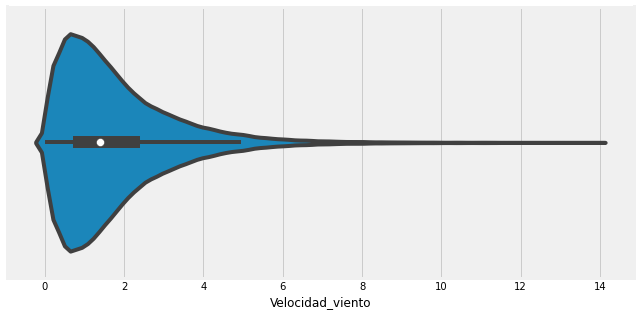

In [ ]:
# Mostramos gráfico tipo violín con datos Velocidad_viento
fig, ax = plt.subplots()
fig.set_size_inches(10,5)
sns.violinplot(datos_filtrados.dropna(subset = ['Velocidad_viento']).Velocidad_viento)

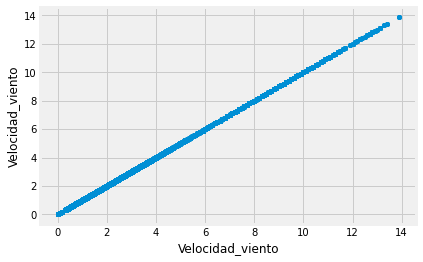

In [ ]:
# Consultamos la concentracion de valores y outliers 
my_plot = datos_filtrados.plot("Velocidad_viento", "Velocidad_viento", kind="scatter")
plt.show() 

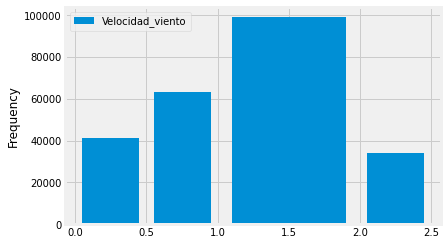

In [ ]:
# Distribución de los valores de la magnitud Velocidad del viento
datos_filtrados[['Velocidad_viento']].plot(kind='hist',bins=[0,0.5,1.0,2,2.0,2.5],rwidth=0.8)
plt.show()

In [ ]:
# Creamos dataframe con viento y Convertimos fecha en datetime
viento = datos_filtrados.loc[:, ["fecha","Velocidad_viento"]]
viento['fecha'] = pd.DatetimeIndex(viento['fecha'])
viento.dtypes

fecha               datetime64[ns]
Velocidad_viento           float64
dtype: object

In [ ]:
# Consultamos valores del la magnitud viento
viento.describe()

,Velocidad_viento
count,306745.000000
mean,1.765884
std,1.459266
min,0.000000
25%,0.700000
50%,1.400000
75%,2.400000
max,13.900000


## c) Dirección del viento

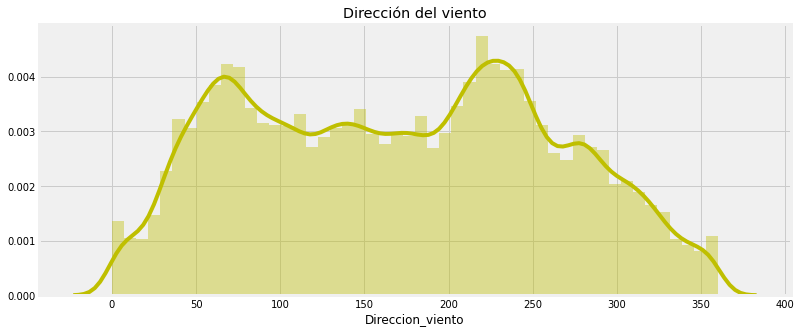

In [ ]:
#Mostramos histograma con valores dirección del viento
plt.figure(figsize=(12,5))
plt.title("Dirección del viento")
ax = sns.distplot(datos_filtrados["Direccion_viento"], color = 'y')



In [ ]:
# Asimetría y curtosis:
print("Asimetría: %f" % datos_filtrados['Direccion_viento'].skew())
print("Curtosis: %f" % datos_filtrados['Direccion_viento'].kurt())

Asimetría: 0.053952
Curtosis: -1.062406


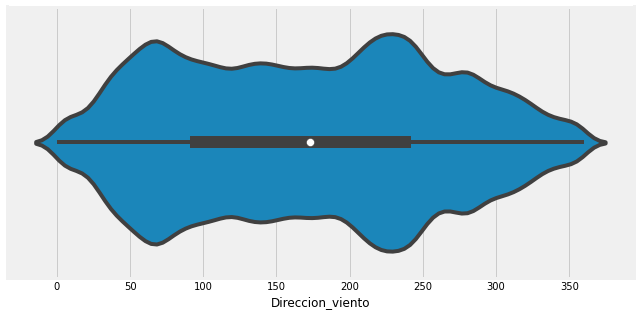

In [ ]:
# Mostramos gráfico tipo violín con datos Direccion_viento
fig, ax = plt.subplots()
fig.set_size_inches(10,5)
sns.violinplot(datos_filtrados.dropna(subset = ['Direccion_viento']).Direccion_viento)

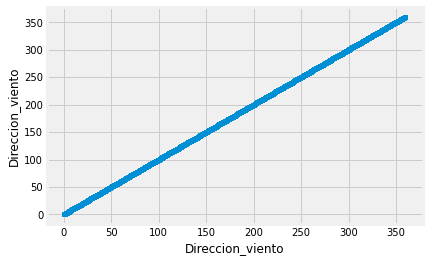

In [ ]:
# Consultamos la concentracion de valores y outliers 
my_plot = datos_filtrados.plot("Direccion_viento", "Direccion_viento", kind="scatter")
plt.show() 

In [ ]:
# Creamos dataframe con Direccion_viento y Convertimos fecha en datetime
direccion = datos_filtrados.loc[:, ["fecha","Direccion_viento"]]
direccion['fecha'] = pd.DatetimeIndex(direccion['fecha'])
direccion.dtypes

fecha               datetime64[ns]
Direccion_viento           float64
dtype: object

In [ ]:
# Consultamos valores del la magnitud viento
direccion.describe()

,Direccion_viento
count,306745.000000
mean,171.096181
std,90.260191
min,0.000000
25%,91.000000
50%,173.000000
75%,242.000000
max,360.000000


## d) Temperatura

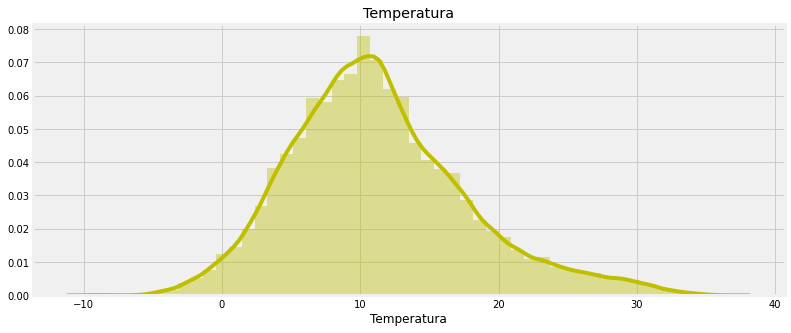

In [ ]:
#Mostramos histograma con valores Temperatura
plt.figure(figsize=(12,5))
plt.title("Temperatura")
ax = sns.distplot(datos_filtrados["Temperatura"], color = 'y')

In [ ]:
# Asimetría y curtosis:
print("Asimetría: %f" % datos_filtrados['Temperatura'].skew())
print("Curtosis: %f" % datos_filtrados['Temperatura'].kurt())

Asimetría: 0.601611
Curtosis: 0.500122


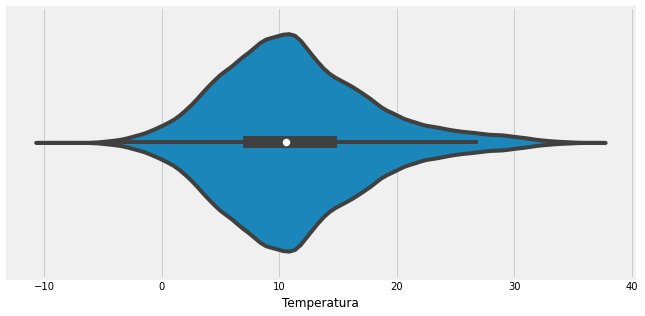

In [ ]:
# Mostramos gráfico tipo violín con datos Temperatura
fig, ax = plt.subplots()
fig.set_size_inches(10,5)
sns.violinplot(datos_filtrados.dropna(subset = ['Temperatura']).Temperatura)

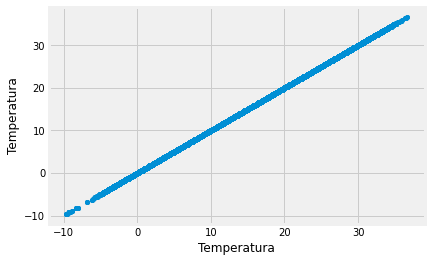

In [ ]:
w# Consultamos la concentracion de valores y outliers 
my_plot = datos_filtrados.plot("Temperatura", "Temperatura", kind="scatter")
plt.show() 

## e) Humedad relativa

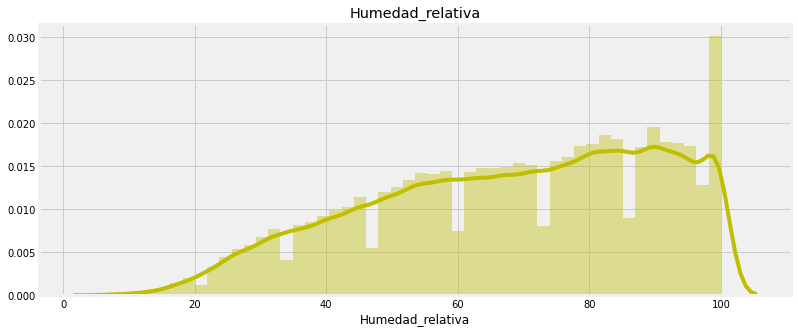

In [ ]:
#Mostramos histograma con valores Humedad relativa
plt.figure(figsize=(12,5))
plt.title("Humedad_relativa")
ax = sns.distplot(datos_filtrados["Humedad_relativa"], color = 'y')


In [ ]:
# Asimetría y curtosis:
print("Asimetría: %f" % datos_filtrados['Humedad_relativa'].skew())
print("Curtosis: %f" % datos_filtrados['Humedad_relativa'].kurt())

Asimetría: -0.367189
Curtosis: -0.840936


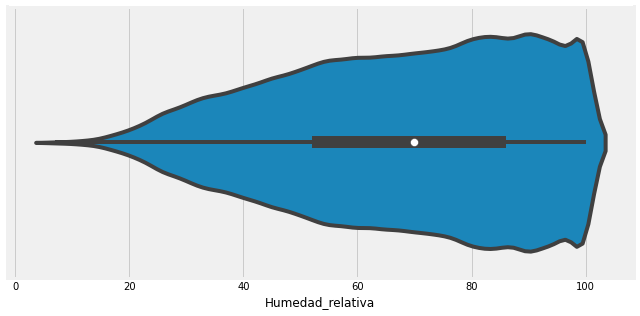

In [ ]:
# Mostramos gráfico tipo violín con datos Humedad relativa
fig, ax = plt.subplots()
fig.set_size_inches(10,5)
sns.violinplot(datos_filtrados.dropna(subset = ['Humedad_relativa']).Humedad_relativa)

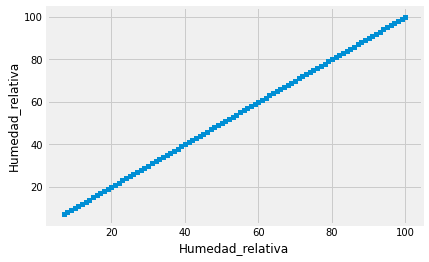

In [ ]:
# Consultamos la concentracion de valores y outliers 
my_plot = datos_filtrados.plot("Humedad_relativa", "Humedad_relativa", kind="scatter")
plt.show() 

In [ ]:
# Asimetría y curtosis:
print("Asimetría: %f" % datos_filtrados['Humedad_relativa'].skew())
print("Curtosis: %f" % datos_filtrados['Humedad_relativa'].kurt())

Asimetría: -0.367189
Curtosis: -0.840936


## f) Presión atmosferica

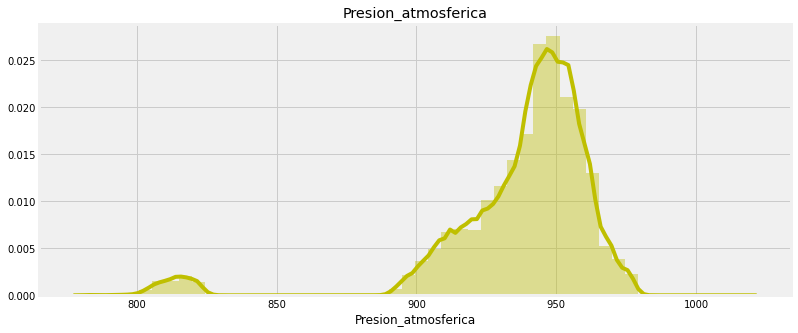

In [ ]:
#Mostramos histograma con valores Presion atmosferica 
plt.figure(figsize=(12,5))
plt.title("Presion_atmosferica")
ax = sns.distplot(datos_filtrados["Presion_atmosferica"], color = 'y')

In [ ]:
# Asimetría y curtosis:
print("Asimetría: %f" % datos_filtrados['Presion_atmosferica'].skew())
print("Curtosis: %f" % datos_filtrados['Presion_atmosferica'].kurt())

Asimetría: -2.651511
Curtosis: 8.872800


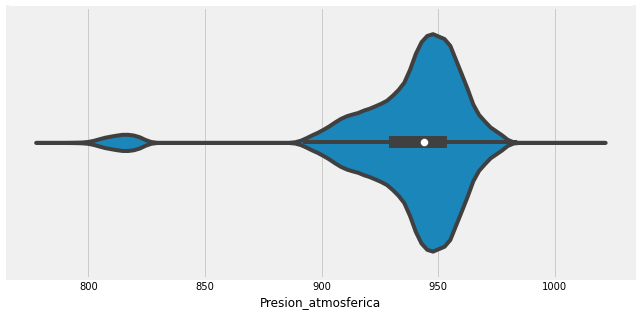

In [ ]:
# Mostramos gráfico tipo violín con datos Presion atmosferica 
fig, ax = plt.subplots()
fig.set_size_inches(10,5)
sns.violinplot(datos_filtrados.dropna(subset = ['Presion_atmosferica']).Presion_atmosferica)

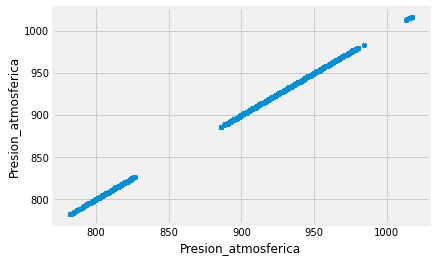

In [ ]:
# Consultamos la concentracion de valores y outliers 
my_plot = datos_filtrados.plot("Presion_atmosferica", "Presion_atmosferica", kind="scatter")
plt.show() 

## g) Radiacción Solar

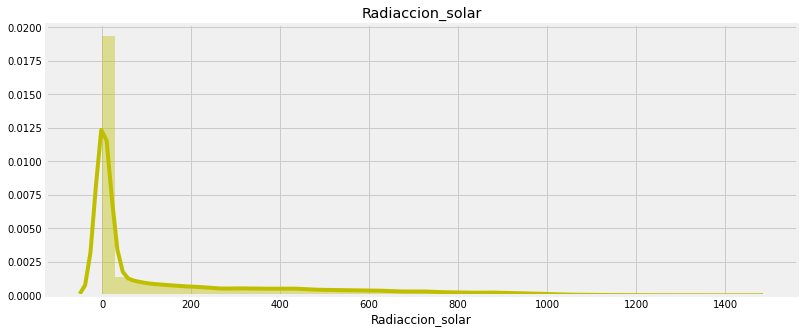

In [ ]:
 #Mostramos histograma con valores Radiacción Solar
plt.figure(figsize=(12,5))
plt.title("Radiaccion_solar")
ax = sns.distplot(datos_filtrados["Radiaccion_solar"], color = 'y')

In [ ]:
# Asimetría y curtosis:
print("Asimetría: %f" % datos_filtrados['Radiaccion_solar'].skew())
print("Curtosis: %f" % datos_filtrados['Radiaccion_solar'].kurt())

Asimetría: 1.607255
Curtosis: 1.641561


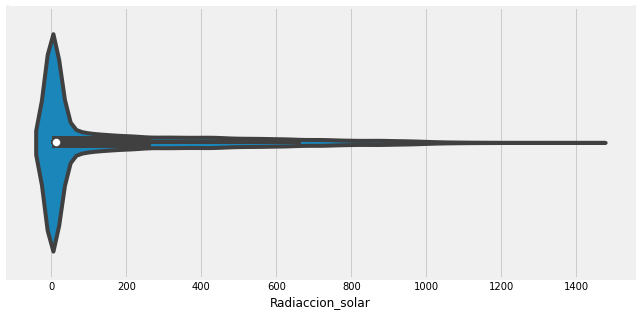

In [ ]:
# Mostramos gráfico tipo violín con datos Radiaccion solar  
fig, ax = plt.subplots()
fig.set_size_inches(10,5)
sns.violinplot(datos_filtrados.dropna(subset = ['Radiaccion_solar']).Radiaccion_solar)

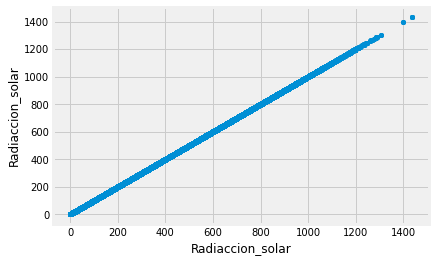

In [ ]:
# Consultamos la concentracion de valores y outliers 
my_plot = datos_filtrados.plot("Radiaccion_solar", "Radiaccion_solar", kind="scatter")
plt.show() 

## h) Precipitación

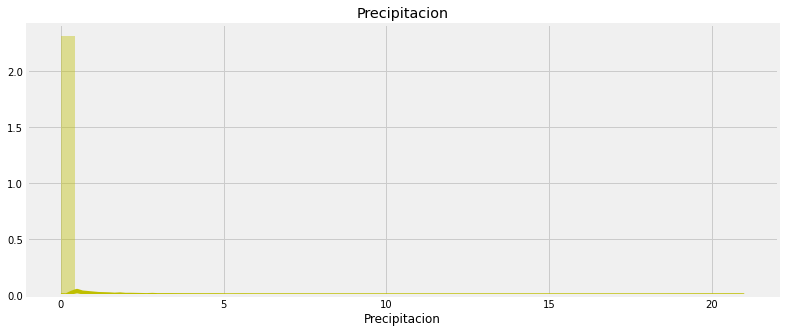

In [ ]:
 #Mostramos histograma con valores Precipitacion
plt.figure(figsize=(12,5))
plt.title("Precipitacion")
ax = sns.distplot(datos_filtrados["Precipitacion"], color = 'y')

In [ ]:
# Asimetría y curtosis:
print("Asimetría: %f" % datos_filtrados['Precipitacion'].skew())
print("Curtosis: %f" % datos_filtrados['Precipitacion'].kurt())

Asimetría: 15.438756
Curtosis: 365.609030


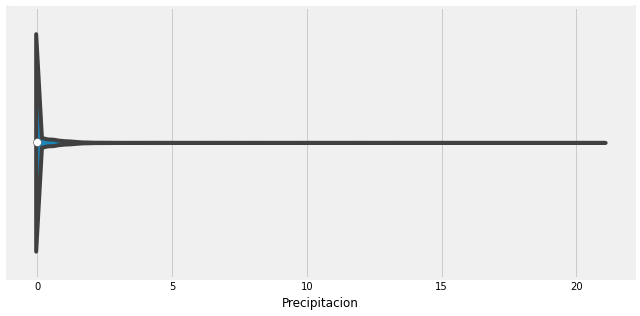

In [ ]:
# Mostramos gráfico tipo violín con datos Precipitacion   
fig, ax = plt.subplots()
fig.set_size_inches(10,5)
sns.violinplot(datos_filtrados.dropna(subset = ['Precipitacion']).Precipitacion)

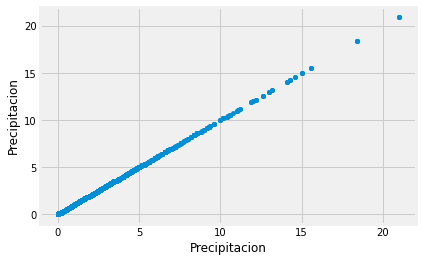

In [ ]:
# Consultamos la concentracion de valores y outliers 
my_plot = datos_filtrados.plot("Precipitacion", "Precipitacion", kind="scatter")
plt.show() 

# 3.Preparacion de los datos

In [ ]:
# Creamos campo binario ica para aquellos valores que superen percentil 75.
datos_filtrados['ica'] = np.where(datos_filtrados['ica_parcial']>=60, 0, 1) # Marcamos con 0 los que superen valor 60
datos_filtrados.head(5)

,id,id_merge,fechahora,fecha,hora,estacion_real,magnitud,descripcion_magnitud,factor_calculo_horario,ica_parcial,valor_magnitud,provincia,municipio,dia_de_la_semana,Velocidad_viento,Direccion_viento,Temperatura,Humedad_relativa,Presion_atmosferica,Radiaccion_solar,Precipitacion,ica
0,2020-1-1-00:00-28102001-1,2020-1-1-00:00-28102001,2020-1-1 00:00,2020-1-1,1,28102001,1,Dióxido de azufre,0.286,0.286,1.0,28,102,2,1.1,15.0,2.7,86.0,946.0,12.0,0.0,1
1,2020-1-1-00:00-28102001-6,2020-1-1-00:00-28102001,2020-1-1 00:00,2020-1-1,1,28102001,6,Monóxido de carbono,10.000,3.000,0.3,28,102,2,1.1,15.0,2.7,86.0,946.0,12.0,0.0,1
2,2020-1-1-00:00-28102001-8,2020-1-1-00:00-28102001,2020-1-1 00:00,2020-1-1,1,28102001,8,Dióxido de nitrógeno,0.500,4.000,8.0,28,102,2,1.1,15.0,2.7,86.0,946.0,12.0,0.0,1
3,2020-1-1-00:00-28102001-10,2020-1-1-00:00-28102001,2020-1-1 00:00,2020-1-1,1,28102001,10,Partículas en suspensión < PM10,0.667,5.336,8.0,28,102,2,1.1,15.0,2.7,86.0,946.0,12.0,0.0,1
4,2020-1-1-00:00-28102001-14,2020-1-1-00:00-28102001,2020-1-1 00:00,2020-1-1,1,28102001,14,Ozono,0.556,21.684,39.0,28,102,2,1.1,15.0,2.7,86.0,946.0,12.0,0.0,1


In [ ]:
# Normalizamos datos de ICA y magnitudes
from sklearn import preprocessing
values = ['ica_parcial', 'Velocidad_viento', 'Direccion_viento', 'Temperatura', 'Humedad_relativa','Presion_atmosferica','Radiaccion_solar','Precipitacion']
x = datos_filtrados[values] #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
datos_normalizados = pd.DataFrame(x_scaled)
datos_normalizados.columns = ['ica_parcial', 'Velocidad_viento', 'Direccion_viento', 'Temperatura', 'Humedad_relativa','Presion_atmosferica','Radiaccion_solar','Precipitacion']
datos_normalizados.insert(0, "Fecha", datos_filtrados["fecha"]) # incluimos fecha
datos_normalizados.head()

,Fecha,ica_parcial,Velocidad_viento,Direccion_viento,Temperatura,Humedad_relativa,Presion_atmosferica,Radiaccion_solar,Precipitacion
0,2020-1-1,0.000000,0.079137,0.041667,0.267241,0.849462,0.697872,0.008362,0.0
1,2020-1-1,0.010472,0.079137,0.041667,0.267241,0.849462,0.697872,0.008362,0.0
2,2020-1-1,0.014330,0.079137,0.041667,0.267241,0.849462,0.697872,0.008362,0.0
3,2020-1-1,0.019485,0.079137,0.041667,0.267241,0.849462,0.697872,0.008362,0.0
4,2020-1-1,0.082561,0.079137,0.041667,0.267241,0.849462,0.697872,0.008362,0.0


In [ ]:
#datos_normalizados.describe()
datos_normalizados.dtypes

Fecha                   object
ica_parcial            float64
Velocidad_viento       float64
Direccion_viento       float64
Temperatura            float64
Humedad_relativa       float64
Presion_atmosferica    float64
Radiaccion_solar       float64
Precipitacion          float64
dtype: object

In [ ]:
# Correlacion entre variables
datos_normalizados.corr()

,ica_parcial,Velocidad_viento,Direccion_viento,Temperatura,Humedad_relativa,Presion_atmosferica,Radiaccion_solar,Precipitacion
ica_parcial,1.000000,-0.002807,0.030969,0.091190,-0.138864,-0.016026,0.065026,-0.000650
Velocidad_viento,-0.002807,1.000000,0.087003,0.046567,-0.149505,-0.166474,0.174825,0.029568
Direccion_viento,0.030969,0.087003,1.000000,0.112804,-0.055589,-0.025468,0.034587,-0.014321
Temperatura,0.091190,0.046567,0.112804,1.000000,-0.662602,0.178888,0.520177,-0.057894
Humedad_relativa,-0.138864,-0.149505,-0.055589,-0.662602,1.000000,-0.062552,-0.511907,0.137632
Presion_atmosferica,-0.016026,-0.166474,-0.025468,0.178888,-0.062552,1.000000,-0.024700,-0.100302
Radiaccion_solar,0.065026,0.174825,0.034587,0.520177,-0.511907,-0.024700,1.000000,-0.060533
Precipitacion,-0.000650,0.029568,-0.014321,-0.057894,0.137632,-0.100302,-0.060533,1.000000


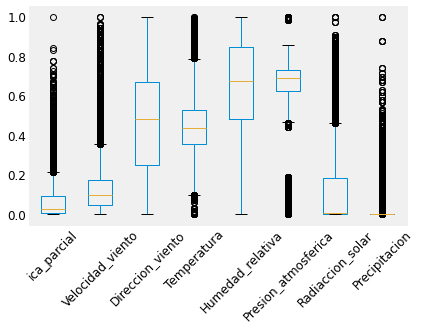

In [ ]:
### Consultamos diagramas box y whisker (cajas y bigotes)
boxplot = datos_normalizados.boxplot(grid=False, rot=45, fontsize=12)

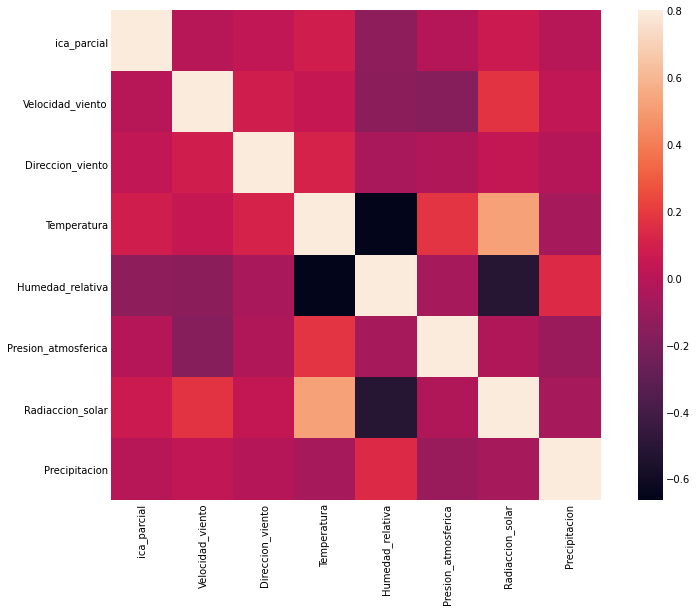

In [ ]:
# Matriz de correlación de las magnitudes
corrmat = datos_normalizados.corr(method='pearson')
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=.8, square=True);

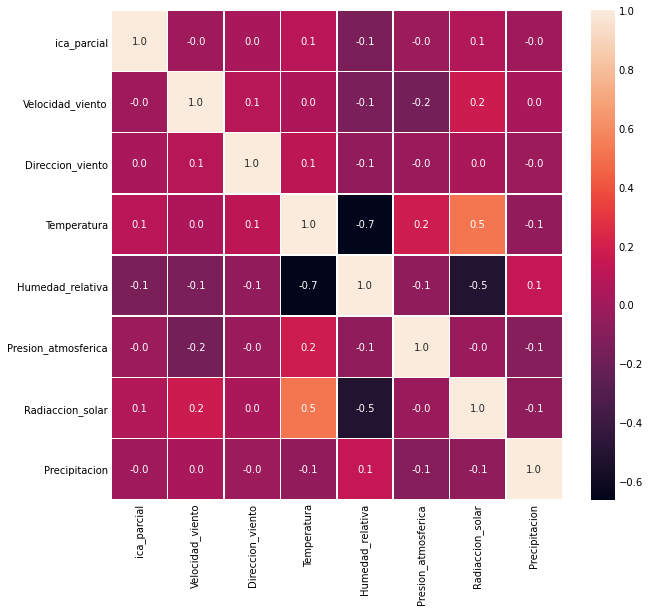

In [ ]:
#Correlacion con datos
f,ax = plt.subplots(figsize=(9, 9))
sns.heatmap(datos_normalizados.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)
plt.show()

# 4.Evaluación de algoritmos



In [ ]:
# Preparamos dataframe
datos_normalizados = datos_normalizados.drop(['Fecha'], axis=1) # eliminamos fecha
datos_normalizados.insert(1, "ica", datos_filtrados["ica"]) # incluimos ica binario >60 1
datos_normalizados.head(5)

,ica,ica_parcial,Velocidad_viento,Direccion_viento,Temperatura,Humedad_relativa,Presion_atmosferica,Radiaccion_solar,Precipitacion
0,1,0.000000,0.079137,0.041667,0.267241,0.849462,0.697872,0.008362,0.0
1,1,0.010472,0.079137,0.041667,0.267241,0.849462,0.697872,0.008362,0.0
2,1,0.014330,0.079137,0.041667,0.267241,0.849462,0.697872,0.008362,0.0
3,1,0.019485,0.079137,0.041667,0.267241,0.849462,0.697872,0.008362,0.0
4,1,0.082561,0.079137,0.041667,0.267241,0.849462,0.697872,0.008362,0.0


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

X = datos_normalizados.drop('ica', axis=1)
y = datos_normalizados.ica

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [ ]:
y


0         1
1         1
2         1
3         1
4         1
         ..
306740    1
306741    1
306742    1
306743    1
306744    1
Name: ica, Length: 306745, dtype: int64

## 1. K-NN

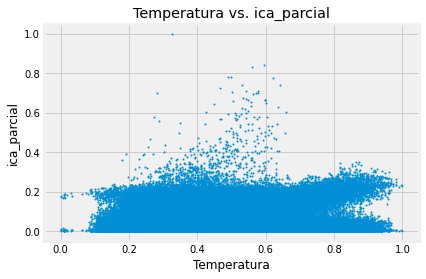

In [ ]:
# Representación gráfica de los datos.
x = datos_normalizados['Temperatura'].values
y = datos_normalizados['ica_parcial'].values
plt.xlabel('Temperatura')
plt.ylabel('ica_parcial')
plt.title('Temperatura vs. ica_parcial')
plt.plot(x,y,'o',markersize=1)

In [ ]:
knMod = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2,
                             metric='minkowski', metric_params=None)

In [ ]:
knMod.fit(X_train, y_train)
knMod.score(X_test, y_test)

0.9963227144105259

## 2. Regresión Logística

In [ ]:
glmMod = LogisticRegression(penalty='l1', dual=False, tol=0.0001, C=1.0, fit_intercept=True,
                            intercept_scaling=1, class_weight=None, 
                            random_state=None, solver='liblinear', max_iter=100,
                            multi_class='ovr', verbose=2)

In [ ]:
glmMod.fit(X_train, y_train)
glmMod.score(X_test, y_test)

[LibLinear]

0.9998565597819709

In [ ]:
test_labels=glmMod.predict_proba(np.array(X_test.values))[:,1]
roc_auc_score(y_test,test_labels , average='macro', sample_weight=None)

0.9999998751893564

## 3. AdaBoost

In [ ]:
adaMod = AdaBoostClassifier(base_estimator=None, n_estimators=200, learning_rate=1.0)

In [ ]:
adaMod.fit(X_train, y_train)
adaMod.score(X_test, y_test)

1.0

In [ ]:
test_labels=adaMod.predict_proba(np.array(X_test.values))[:,1]
roc_auc_score(y_test,test_labels , average='macro', sample_weight=None)

1.0

## 4. GradientBoosting

In [ ]:
gbMod = GradientBoostingClassifier(loss='deviance', learning_rate=0.1, n_estimators=200, subsample=1.0,
                                   min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
                                   max_depth=3,
                                   init=None, random_state=None, max_features=None, verbose=0)

In [ ]:
gbMod.fit(X_train, y_train)
gbMod.score(X_test, y_test)

1.0

In [ ]:
test_labels=gbMod.predict_proba(np.array(X_test.values))[:,1]
roc_auc_score(y_test,test_labels , average='macro', sample_weight=None)

1.0

## 5. RandomForest

In [ ]:
rfMod = RandomForestClassifier(n_estimators=10, criterion='gini', max_depth=None, min_samples_split=2,
                               min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto',
                               max_leaf_nodes=None, bootstrap=True, oob_score=False, n_jobs=1, 
                               random_state=None, verbose=0)

In [ ]:
rfMod.fit(X_train, y_train)
rfMod.score(X_test, y_test)

0.9999869599801792

In [ ]:
test_labels=rfMod.predict_proba(np.array(X_test.values))[:,1]
roc_auc_score(y_test,test_labels , average='macro', sample_weight=None)

1.0